In [ ]:
# QRS,bpm 구해야됨 두개 다 전부

https://m.blog.naver.com/racoonjonny/221619139911

In [ ]:
# asd = pd.read_csv('/content/drive/MyDrive/생체신호/전처리/sum_ecg.csv')

In [ ]:
# asd

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,tar_yyj,tar_ytu,tar_kjj
0,108,113,101,107,125,135,116,92,92,89,...,136,126,123,138,137,134,140,1,0,0
1,145,139,140,142,137,135,137,143,153,150,...,162,157,156,156,171,174,171,1,0,0
2,175,179,185,184,182,180,187,190,183,179,...,142,138,144,145,148,147,144,1,0,0
3,139,149,149,142,140,145,147,149,154,161,...,142,155,159,165,164,169,165,1,0,0
4,165,170,171,178,185,190,189,191,189,190,...,142,144,148,149,145,146,146,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,152,154,163,188,209,208,192,154,144,151,...,171,171,173,171,172,172,174,0,0,1
1796,175,177,176,179,179,180,181,183,184,185,...,168,172,172,173,173,176,175,0,0,1
1797,174,173,169,165,161,156,148,141,137,135,...,125,128,127,127,128,128,130,0,0,1
1798,130,130,128,130,132,128,130,130,131,131,...,140,144,145,147,148,152,154,0,0,1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import firwin, freqz, lfilter, iirfilter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#전처리 전에 하던거

In [ ]:
file_path_yj = '/content/drive/MyDrive/생체신호/long_ecg/long_ecg_유영준.txt'

In [ ]:
file_path = '/content/drive/MyDrive/생체신호/long_ecg/long_ecg_김재준.txt'

In [ ]:
file_path = '/content/drive/MyDrive/생체신호/long_ecg/long_ecg_윤태웅.txt'

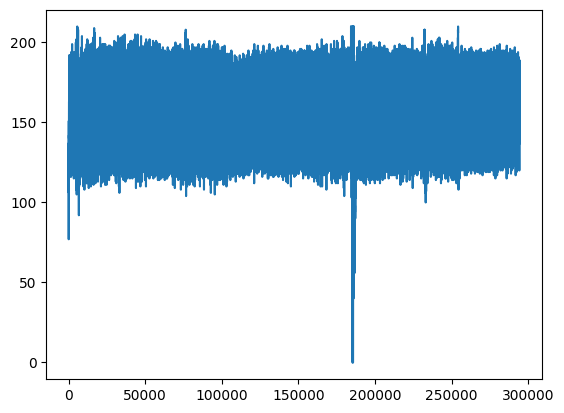

In [ ]:
with open(file_path_yj,'r') as file:
  contents = file.readlines()

ECG_raw_yj = [float(line.strip()) for line in contents]

plt.plot(ECG_raw_yj)

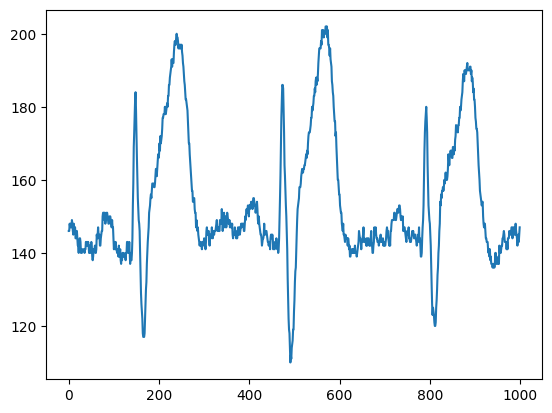

In [ ]:
plt.plot(np.array(ECG_raw_yj)[50000:51000])

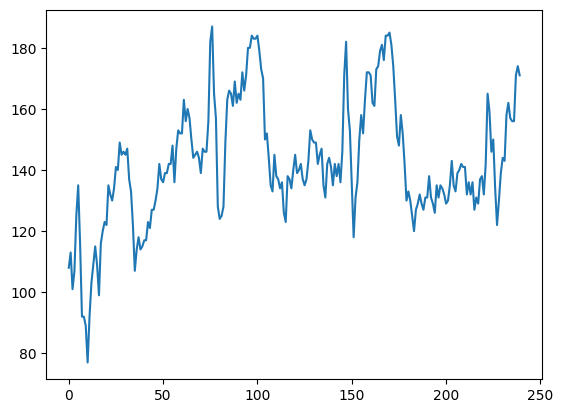

In [ ]:
plt.plot(np.array(ECG_raw_yj)[0::4][:240])

In [ ]:
ECG_raw_yj_120hz = np.array(ECG_raw_yj)[0::4]
ECG_raw_yj_120hz.shape

(73599,)

In [ ]:
ECG_raw_yj_120hz

array([108., 113., 101., ..., 143., 143., 139.])

In [ ]:
yj_120hz_x = []

In [ ]:
idx1=0
idx2=120
for i in range(613):
  # print(idx1)
  # print(idx2)
  # print('---------')
  before_onehot = yj_120hz_x.append(list(ECG_raw_yj_120hz[idx1:idx2]))
  idx1 += 120
  idx2 += 120

#전처리 120hz

In [ ]:
(120*598)+360

72120

In [ ]:
file_path_yj = '/content/drive/MyDrive/생체신호/long_ecg/long_ecg_유영준.txt'

with open(file_path_yj,'r') as file:
  contents = file.readlines()
ECG_raw_yj = [float(line.strip()) for line in contents]
# plt.plot(ECG_raw_yj)

ECG_raw_yj_120hz = np.array(ECG_raw_yj)[0::4]

yj_120hz_x = []

idx1=0
idx2=360
for i in range(598):
  before_onehot = yj_120hz_x.append(list(ECG_raw_yj_120hz[idx1:idx2]))
  idx1 += 120
  idx2 += 120

# print(idx1)
# print(idx2)

yj_120hz_y=[[1.0, 0.0, 0.0]]*len(yj_120hz_x)
print(np.array(yj_120hz_x).shape)
print(np.array(yj_120hz_y).shape)

(598, 360)
(598, 3)


In [ ]:
file_path_tu = '/content/drive/MyDrive/생체신호/long_ecg/long_ecg_윤태웅.txt'

with open(file_path_tu,'r') as file:
  contents = file.readlines()
ECG_raw_tu = [float(line.strip()) for line in contents]

ECG_raw_tu_120hz = np.array(ECG_raw_tu)[0::4]

tu_120hz_x = []

idx1=0
idx2=360
for i in range(598):
  before_onehot = tu_120hz_x.append(list(ECG_raw_tu_120hz[idx1:idx2]))
  idx1 += 120
  idx2 += 120

tu_120hz_y=[[0.0, 1.0, 0.0]]*len(tu_120hz_x)
print(np.array(tu_120hz_x).shape)
print(np.array(tu_120hz_y).shape)

(598, 360)
(598, 3)


In [ ]:
file_path_jj = '/content/drive/MyDrive/생체신호/long_ecg/long_ecg_김재준.txt'

with open(file_path_jj,'r') as file:
  contents = file.readlines()
ECG_raw_jj = [float(line.strip()) for line in contents]

ECG_raw_jj_120hz = np.array(ECG_raw_jj)[0::4]

jj_120hz_x = []

idx1=0
idx2=360
for i in range(598):
  before_onehot = jj_120hz_x.append(list(ECG_raw_jj_120hz[idx1:idx2]))
  idx1 += 120
  idx2 += 120

jj_120hz_y=[[0.0, 0.0, 1.0]]*len(jj_120hz_x)
print(np.array(jj_120hz_x).shape)
print(np.array(jj_120hz_y).shape)

(598, 360)
(598, 3)


In [ ]:
all_120hz_x = yj_120hz_x + tu_120hz_x + jj_120hz_x
all_120hz_y = yj_120hz_y + tu_120hz_y + jj_120hz_y

In [ ]:
print(np.array(all_120hz_x).shape)
print(np.array(all_120hz_y).shape)

(1794, 360)
(1794, 3)


In [ ]:
df_all_120hz_x = pd.DataFrame(all_120hz_x)
df_all_120hz_y = pd.DataFrame(all_120hz_y)

In [ ]:
df_all_120hz_x

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,108.0,113.0,101.0,107.0,125.0,135.0,116.0,92.0,92.0,89.0,...,151.0,143.0,141.0,142.0,138.0,144.0,145.0,148.0,147.0,144.0
1,145.0,139.0,140.0,142.0,137.0,135.0,137.0,143.0,153.0,150.0,...,120.0,119.0,127.0,142.0,155.0,159.0,165.0,164.0,169.0,165.0
2,175.0,179.0,185.0,184.0,182.0,180.0,187.0,190.0,183.0,179.0,...,151.0,149.0,148.0,142.0,144.0,148.0,149.0,145.0,146.0,146.0
3,139.0,149.0,149.0,142.0,140.0,145.0,147.0,149.0,154.0,161.0,...,174.0,178.0,182.0,184.0,186.0,181.0,188.0,184.0,183.0,178.0
4,165.0,170.0,171.0,178.0,185.0,190.0,189.0,191.0,189.0,190.0,...,150.0,145.0,144.0,147.0,143.0,140.0,143.0,142.0,141.0,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,145.0,144.0,146.0,146.0,148.0,148.0,148.0,152.0,156.0,155.0,...,186.0,161.0,169.0,171.0,171.0,173.0,171.0,172.0,172.0,174.0
1790,151.0,150.0,146.0,148.0,146.0,146.0,146.0,147.0,148.0,147.0,...,165.0,166.0,168.0,168.0,172.0,172.0,173.0,173.0,176.0,175.0
1791,152.0,154.0,163.0,188.0,209.0,208.0,192.0,154.0,144.0,151.0,...,125.0,125.0,123.0,125.0,128.0,127.0,127.0,128.0,128.0,130.0
1792,175.0,177.0,176.0,179.0,179.0,180.0,181.0,183.0,184.0,185.0,...,140.0,138.0,139.0,140.0,144.0,145.0,147.0,148.0,152.0,154.0


In [ ]:
df_all_120hz_y

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
1789,0.0,0.0,1.0
1790,0.0,0.0,1.0
1791,0.0,0.0,1.0
1792,0.0,0.0,1.0


In [ ]:
df_all_120hz_y.columns = ['tar_yyj', 'tar_ytu', 'tar_kjj']

In [ ]:
sum_ecg = pd.concat([df_all_120hz_x, df_all_120hz_y], axis=1)

In [ ]:
sum_ecg

,0,1,2,3,4,5,6,7,8,9,...,353,354,355,356,357,358,359,tar_yyj,tar_ytu,tar_kjj
0,108.0,113.0,101.0,107.0,125.0,135.0,116.0,92.0,92.0,89.0,...,142.0,138.0,144.0,145.0,148.0,147.0,144.0,1.0,0.0,0.0
1,145.0,139.0,140.0,142.0,137.0,135.0,137.0,143.0,153.0,150.0,...,142.0,155.0,159.0,165.0,164.0,169.0,165.0,1.0,0.0,0.0
2,175.0,179.0,185.0,184.0,182.0,180.0,187.0,190.0,183.0,179.0,...,142.0,144.0,148.0,149.0,145.0,146.0,146.0,1.0,0.0,0.0
3,139.0,149.0,149.0,142.0,140.0,145.0,147.0,149.0,154.0,161.0,...,184.0,186.0,181.0,188.0,184.0,183.0,178.0,1.0,0.0,0.0
4,165.0,170.0,171.0,178.0,185.0,190.0,189.0,191.0,189.0,190.0,...,147.0,143.0,140.0,143.0,142.0,141.0,139.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,145.0,144.0,146.0,146.0,148.0,148.0,148.0,152.0,156.0,155.0,...,171.0,171.0,173.0,171.0,172.0,172.0,174.0,0.0,0.0,1.0
1790,151.0,150.0,146.0,148.0,146.0,146.0,146.0,147.0,148.0,147.0,...,168.0,172.0,172.0,173.0,173.0,176.0,175.0,0.0,0.0,1.0
1791,152.0,154.0,163.0,188.0,209.0,208.0,192.0,154.0,144.0,151.0,...,125.0,128.0,127.0,127.0,128.0,128.0,130.0,0.0,0.0,1.0
1792,175.0,177.0,176.0,179.0,179.0,180.0,181.0,183.0,184.0,185.0,...,140.0,144.0,145.0,147.0,148.0,152.0,154.0,0.0,0.0,1.0


In [ ]:
sum_ecg.to_csv('/content/drive/MyDrive/생체신호/전처리모음/sum_ecg_360.csv', index=False)

In [ ]:
# all_120hz_x = np.array(all_120hz_x)
# all_120hz_y = np.array(all_120hz_y)

In [ ]:
# print(all_120hz_x.shape)
# print(all_120hz_y.shape)

(1800, 120)
(1800, 3)


In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(all_120hz_x, all_120hz_y, test_size=0.2, random_state=777, stratify=all_120hz_y)

In [ ]:
# x_test.shape

(360, 120)

In [ ]:
# x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=777, stratify=y_test)

#전처리 480hz

In [ ]:
file_path_yj = '/content/drive/MyDrive/생체신호/long_ecg/long_ecg_유영준.txt'

with open(file_path_yj,'r') as file:
  contents = file.readlines()
ECG_raw_yj = [float(line.strip()) for line in contents]
# plt.plot(ECG_raw_yj)

ECG_raw_yj_120hz = np.array(ECG_raw_yj)

yj_120hz_x = []

idx1=0
idx2=1440
for i in range(598):
  before_onehot = yj_120hz_x.append(list(ECG_raw_yj_120hz[idx1:idx2]))
  idx1 += 480
  idx2 += 480

# print(idx1)
# print(idx2)

yj_120hz_y=[[1.0, 0.0, 0.0]]*len(yj_120hz_x)
print(np.array(yj_120hz_x).shape)
print(np.array(yj_120hz_y).shape)

(598, 1440)
(598, 3)


In [ ]:
file_path_tu = '/content/drive/MyDrive/생체신호/long_ecg/long_ecg_윤태웅.txt'

with open(file_path_tu,'r') as file:
  contents = file.readlines()
ECG_raw_tu = [float(line.strip()) for line in contents]

ECG_raw_tu_120hz = np.array(ECG_raw_tu)

tu_120hz_x = []

idx1=0
idx2=1440
for i in range(598):
  before_onehot = tu_120hz_x.append(list(ECG_raw_tu_120hz[idx1:idx2]))
  idx1 += 480
  idx2 += 480

tu_120hz_y=[[0.0, 1.0, 0.0]]*len(tu_120hz_x)
print(np.array(tu_120hz_x).shape)
print(np.array(tu_120hz_y).shape)

(598, 1440)
(598, 3)


In [ ]:
file_path_jj = '/content/drive/MyDrive/생체신호/long_ecg/long_ecg_김재준.txt'

with open(file_path_jj,'r') as file:
  contents = file.readlines()
ECG_raw_jj = [float(line.strip()) for line in contents]

ECG_raw_jj_120hz = np.array(ECG_raw_jj)

jj_120hz_x = []

idx1=0
idx2=1440
for i in range(598):
  before_onehot = jj_120hz_x.append(list(ECG_raw_jj_120hz[idx1:idx2]))
  idx1 += 480
  idx2 += 480

jj_120hz_y=[[0.0, 0.0, 1.0]]*len(jj_120hz_x)
print(np.array(jj_120hz_x).shape)
print(np.array(jj_120hz_y).shape)

(598, 1440)
(598, 3)


In [ ]:
all_120hz_x = yj_120hz_x + tu_120hz_x + jj_120hz_x
all_120hz_y = yj_120hz_y + tu_120hz_y + jj_120hz_y

In [ ]:
print(np.array(all_120hz_x).shape)
print(np.array(all_120hz_y).shape)

(1794, 1440)
(1794, 3)


In [ ]:
df_all_120hz_x = pd.DataFrame(all_120hz_x)
df_all_120hz_y = pd.DataFrame(all_120hz_y)

In [ ]:
df_all_120hz_x

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
0,108.0,113.0,117.0,117.0,113.0,110.0,105.0,101.0,101.0,99.0,...,147.0,148.0,147.0,144.0,145.0,142.0,144.0,143.0,144.0,142.0
1,145.0,146.0,144.0,141.0,139.0,139.0,140.0,139.0,140.0,139.0,...,166.0,167.0,169.0,168.0,168.0,165.0,165.0,164.0,164.0,164.0
2,175.0,176.0,173.0,179.0,179.0,182.0,184.0,185.0,185.0,182.0,...,146.0,145.0,146.0,147.0,146.0,147.0,146.0,147.0,147.0,148.0
3,139.0,142.0,145.0,146.0,149.0,149.0,151.0,151.0,149.0,145.0,...,186.0,185.0,183.0,179.0,179.0,179.0,178.0,178.0,180.0,179.0
4,165.0,169.0,167.0,170.0,170.0,169.0,170.0,171.0,171.0,176.0,...,143.0,143.0,141.0,141.0,140.0,139.0,139.0,140.0,139.0,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,145.0,143.0,145.0,145.0,144.0,145.0,145.0,143.0,146.0,144.0,...,174.0,173.0,172.0,174.0,176.0,173.0,174.0,176.0,175.0,175.0
1790,151.0,151.0,150.0,150.0,150.0,148.0,149.0,147.0,146.0,148.0,...,174.0,176.0,176.0,173.0,174.0,175.0,175.0,173.0,172.0,172.0
1791,152.0,156.0,153.0,152.0,154.0,155.0,156.0,160.0,163.0,169.0,...,129.0,128.0,128.0,129.0,130.0,128.0,130.0,128.0,127.0,129.0
1792,175.0,174.0,174.0,176.0,177.0,175.0,176.0,177.0,176.0,176.0,...,150.0,151.0,152.0,153.0,152.0,153.0,154.0,153.0,152.0,152.0


In [ ]:
df_all_120hz_y

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
1789,0.0,0.0,1.0
1790,0.0,0.0,1.0
1791,0.0,0.0,1.0
1792,0.0,0.0,1.0


In [ ]:
df_all_120hz_y.columns = ['tar_yyj', 'tar_ytu', 'tar_kjj']

In [ ]:
sum_ecg = pd.concat([df_all_120hz_x, df_all_120hz_y], axis=1)

In [ ]:
sum_ecg

,0,1,2,3,4,5,6,7,8,9,...,1433,1434,1435,1436,1437,1438,1439,tar_yyj,tar_ytu,tar_kjj
0,108.0,113.0,117.0,117.0,113.0,110.0,105.0,101.0,101.0,99.0,...,144.0,145.0,142.0,144.0,143.0,144.0,142.0,1.0,0.0,0.0
1,145.0,146.0,144.0,141.0,139.0,139.0,140.0,139.0,140.0,139.0,...,168.0,168.0,165.0,165.0,164.0,164.0,164.0,1.0,0.0,0.0
2,175.0,176.0,173.0,179.0,179.0,182.0,184.0,185.0,185.0,182.0,...,147.0,146.0,147.0,146.0,147.0,147.0,148.0,1.0,0.0,0.0
3,139.0,142.0,145.0,146.0,149.0,149.0,151.0,151.0,149.0,145.0,...,179.0,179.0,179.0,178.0,178.0,180.0,179.0,1.0,0.0,0.0
4,165.0,169.0,167.0,170.0,170.0,169.0,170.0,171.0,171.0,176.0,...,141.0,140.0,139.0,139.0,140.0,139.0,140.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,145.0,143.0,145.0,145.0,144.0,145.0,145.0,143.0,146.0,144.0,...,174.0,176.0,173.0,174.0,176.0,175.0,175.0,0.0,0.0,1.0
1790,151.0,151.0,150.0,150.0,150.0,148.0,149.0,147.0,146.0,148.0,...,173.0,174.0,175.0,175.0,173.0,172.0,172.0,0.0,0.0,1.0
1791,152.0,156.0,153.0,152.0,154.0,155.0,156.0,160.0,163.0,169.0,...,129.0,130.0,128.0,130.0,128.0,127.0,129.0,0.0,0.0,1.0
1792,175.0,174.0,174.0,176.0,177.0,175.0,176.0,177.0,176.0,176.0,...,153.0,152.0,153.0,154.0,153.0,152.0,152.0,0.0,0.0,1.0


In [ ]:
sum_ecg.to_csv('/content/drive/MyDrive/생체신호/전처리모음/sum_ecg_480_3s.csv', index=False)

In [ ]:
# all_120hz_x = np.array(all_120hz_x)
# all_120hz_y = np.array(all_120hz_y)

In [ ]:
# print(all_120hz_x.shape)
# print(all_120hz_y.shape)

(1800, 120)
(1800, 3)


In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(all_120hz_x, all_120hz_y, test_size=0.2, random_state=777, stratify=all_120hz_y)

In [ ]:
# x_test.shape

(360, 120)

In [ ]:
# x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=777, stratify=y_test)

#케라스

In [ ]:
from tensorflow import keras

In [ ]:
import tensorflow as tf

In [ ]:
all_120hz_x.shape[1:]

(120,)

In [ ]:
input = keras.layers.Input(shape=all_120hz_x.shape[1:])
hidden1 = keras.layers.Dense(60, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
output = keras.layers.Dense(3, activation="softmax")(hidden2)
model = keras.models.Model(inputs=[input], outputs=[output])

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy')

In [ ]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 120)]             0         
                                                                 
 dense_35 (Dense)            (None, 60)                7260      
                                                                 
 dense_36 (Dense)            (None, 30)                1830      
                                                                 
 dense_37 (Dense)            (None, 3)                 93        
                                                                 
Total params: 9183 (35.87 KB)
Trainable params: 9183 (35.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/생체신호/model_save/1/Model_BestLoss.h5', save_best_only=True, monitor='val_loss', mode='min') #save_weights_only=True

In [ ]:
# history = model.fit(all_120hz_x, all_120hz_y, batch_size=128, epochs=1000, validation_split=0.2, shuffle=True)
history = model.fit(all_120hz_x, all_120hz_y, batch_size=64, epochs=1000, validation_split=0.2, shuffle=True, callbacks=[mcp_save])

Epoch 1/1000
23/23 [==============================] - 1s 12ms/step - loss: 90.5847 - val_loss: 10.3005
Epoch 2/1000
23/23 [==============================] - 0s 5ms/step - loss: 38.1052 - val_loss: 13.3651
Epoch 3/1000
 1/23 [>.............................] - ETA: 0s - loss: 20.7637

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 0s 5ms/step - loss: 11.8720 - val_loss: 14.6939
Epoch 4/1000
23/23 [==============================] - 0s 6ms/step - loss: 6.3619 - val_loss: 12.4078
Epoch 5/1000
23/23 [==============================] - 0s 6ms/step - loss: 5.4636 - val_loss: 15.2915
Epoch 6/1000
23/23 [==============================] - 0s 5ms/step - loss: 5.1166 - val_loss: 13.2129
Epoch 7/1000
23/23 [==============================] - 0s 5ms/step - loss: 4.9770 - val_loss: 11.9579
Epoch 8/1000
23/23 [==============================] - 0s 6ms/step - loss: 4.7652 - val_loss: 9.4656
Epoch 9/1000
23/23 [==============================] - 0s 5ms/step - loss: 4.5652 - val_loss: 12.1271
Epoch 10/1000
23/23 [==============================] - 0s 5ms/step - loss: 4.2192 - val_loss: 11.3315
Epoch 11/1000
23/23 [==============================] - 0s 5ms/step - loss: 3.7790 - val_loss: 10.1501
Epoch 12/1000
23/23 [==============================] - 0s 5ms/step - loss: 3.4617 - val_loss: 13.6629


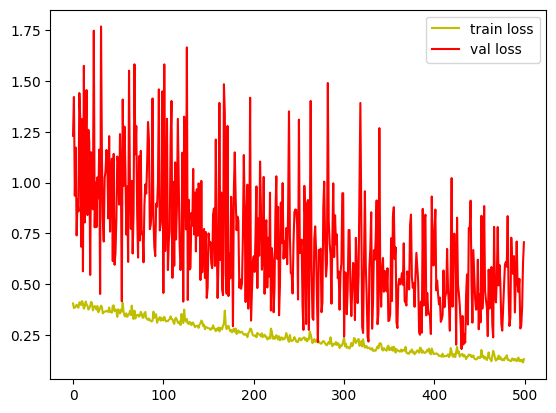

In [ ]:
plt.figure()
plt.plot(history.history['loss'][500:], 'y', label='train loss')
plt.plot(history.history['val_loss'][500:], 'r', label='val loss')
plt.legend()

#------

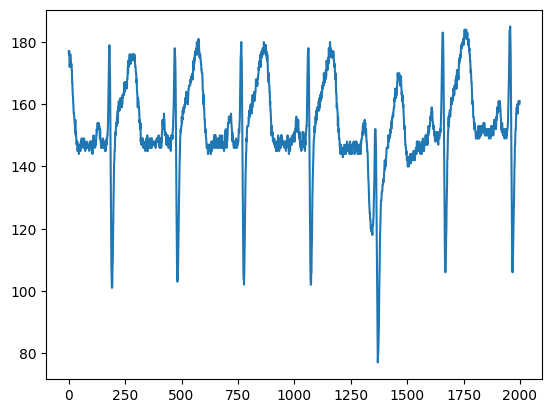

In [ ]:
#태웅이형
with open(file_path,'r') as file:
  contents = file.readlines()

ECG_raw = [float(line.strip()) for line in contents]

plt.plot(ECG_raw[102000:104000])
# plt.plot(ECG_raw)

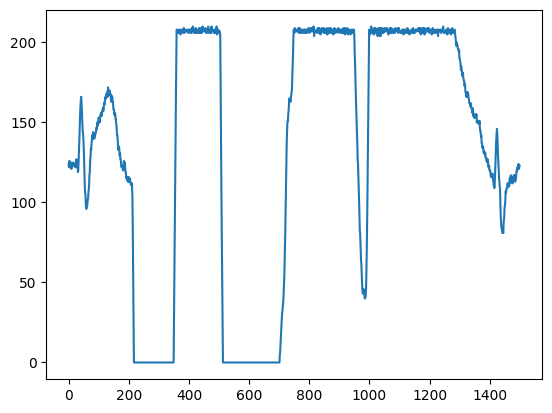

In [ ]:
#영준
with open(file_path,'r') as file:
  contents = file.readlines()

ECG_raw = [float(line.strip()) for line in contents]

plt.plot(ECG_raw[185000:186500])
# length=4*480
# samp = 480
# plt.plot(np.arange(length)/samp,ECG_raw[:length])

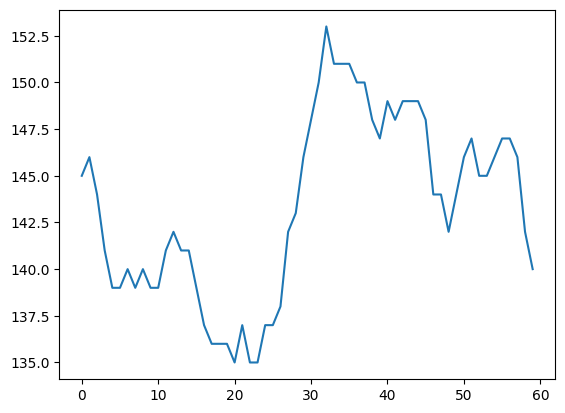

In [ ]:
llength=60
aa=ECG_raw[480:480+llength]
plt.plot(np.arange(len(aa)), aa)

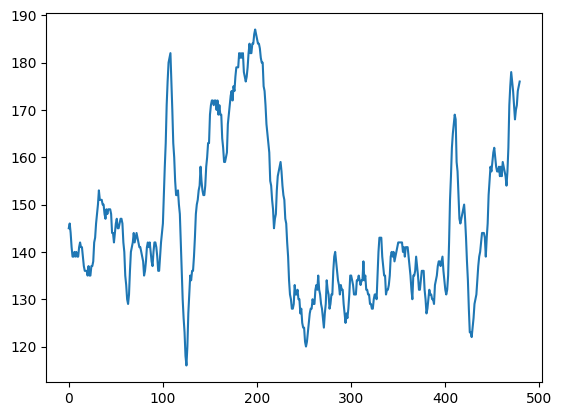

In [ ]:
plt.plot(np.arange(len(aa)), aa)